Write a program (or programs) to integrate a set of an arbitrary number
of coupled differential equations using the Euler method, fourth order
Runge-Kutta, and Leapfrog. (Note: Leapfrog only applies to special
cases.) For Runge-Kutta, you may use a packaged routine such as
available in scipy or Numerical Recipes. If you do used a packaged
routine, be sure to use one with a fixed timestep and order so
that testing the convergence can be easily performed

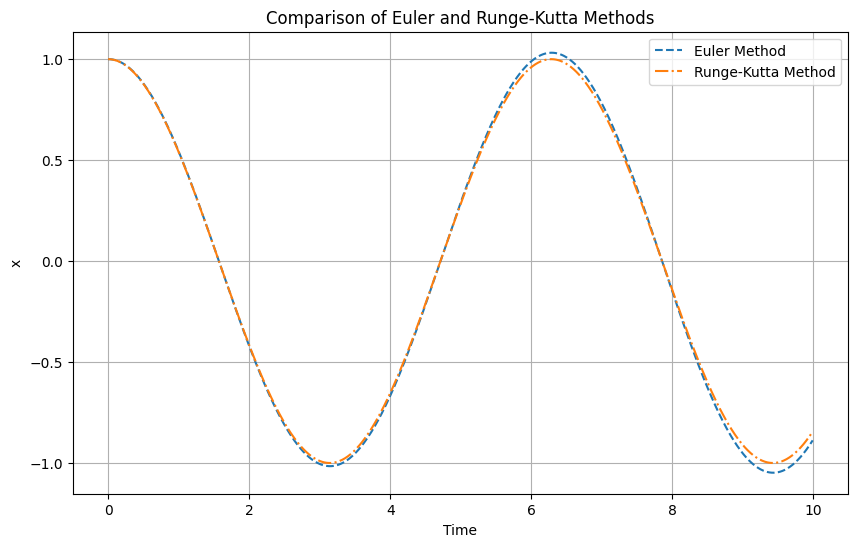

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the derivative for the system of ODEs in Problem 2
def deriv(y):
    """
    Computes the derivative of the system of ODEs for Problem 2.
    Args:
    y (numpy array): Array containing [x, x', y, y']

    Returns:
    numpy array: Derivatives [x', x'', y', y'']
    """
    return np.array([y[1], -y[0], y[3], -y[2]])

# Define the initial conditions and the interval for integration
initial_state = [1, 0, 0, 1]
t = [0, 10]  # Integration from t=0 to t=10
step_size = 0.01  # Initial step size

# Define the Euler method for solving ODEs
def euler_method(deriv, state, dt):
    """
    Euler method for one step of the numerical integration.
    Args:
    deriv (function): Function to compute the derivatives
    state (list): Current state of the system
    dt (float): Time step size

    Returns:
    list: Updated state of the system after one step
    """
    state = np.array(state)
    return state + dt * deriv(state)

# Define the Runge-Kutta method for solving ODEs
def runge_kutta_method(deriv, state, dt):
    """
    Runge-Kutta method for one step of the numerical integration.
    Args:
    deriv (function): Function to compute the derivatives
    state (list): Current state of the system
    dt (float): Time step size

    Returns:
    list: Updated state of the system after one step
    """
    state = np.array(state)
    k1 = dt * deriv(state)
    k2 = dt * deriv(state + 0.5 * k1)
    k3 = dt * deriv(state + 0.5 * k2)
    k4 = dt * deriv(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

# Initialize arrays to store results
times = np.arange(t[0], t[1], step_size)
x_euler = []
x_rk = []

# Perform the integration using Euler and Runge-Kutta methods
state_euler = initial_state.copy()
state_rk = initial_state.copy()
for time in times:
    x_euler.append(state_euler[0])
    x_rk.append(state_rk[0])
    state_euler = euler_method(deriv, state_euler, step_size)
    state_rk = runge_kutta_method(deriv, state_rk, step_size)

# Plot the results for comparison
plt.figure(figsize=(10, 6))
plt.plot(times, x_euler, label='Euler Method', linestyle='--')
plt.plot(times, x_rk, label='Runge-Kutta Method', linestyle='-.')
plt.title('Comparison of Euler and Runge-Kutta Methods')
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.grid(True)
plt.show()


$$\frac{dx^2}{dt} +x = 0$$

In [ ]:
x = [1]
dx = [0]
t = np.arange(0.0, 30, 0.1)
spacing = 0.1

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/error_convergence_plot.png'

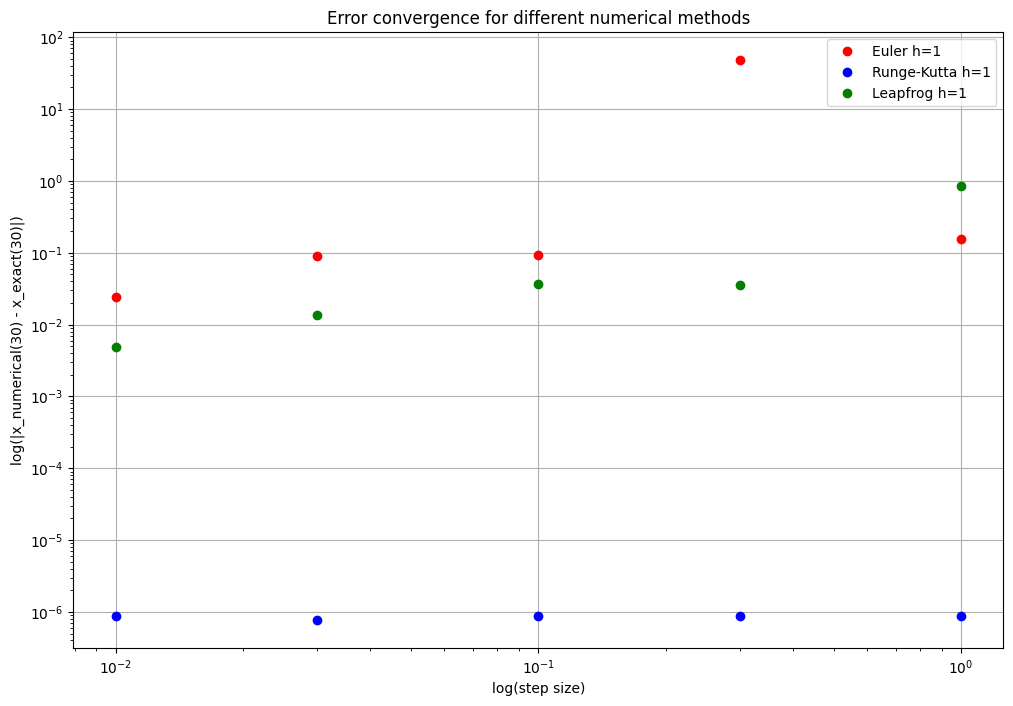

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def system_of_equations(t, y):
    return [y[1], -y[0]]

def euler_method(system, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i - 1]
        y[i] = y[i - 1] + np.array(system(t[i - 1], y[i - 1])) * dt
    return y[:, 0]

def runge_kutta_fixed_step(system, y0, t):
    sol = solve_ivp(system, [t[0], t[-1]], y0, t_eval=t, method='RK45', rtol=1e-6, atol=1e-9)
    return sol.y[0]

def leapfrog_method(system, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    dt = t[1] - t[0]
    v = y0[1]
    for i in range(1, len(t)):
        y[i, 0] = y[i-1, 0] + v * dt
        a = -y[i, 0]
        v = v + a * dt
        y[i, 1] = v
    return y[:, 0]

step_sizes = [1, 0.3, 0.1, 0.03, 0.01]
t_end = 30

plt.figure(figsize=(12, 8))

for h in step_sizes:
    t_points = np.arange(0, t_end + h, h)

    y_euler = euler_method(system_of_equations, [1, 0], t_points)
    y_runge_kutta = runge_kutta_fixed_step(system_of_equations, [1, 0], t_points)
    y_leapfrog = leapfrog_method(system_of_equations, [1, 0], t_points)
    y_exact = np.cos(t_points)

    error_euler = np.abs(y_euler[-1] - y_exact[-1])
    error_runge_kutta = np.abs(y_runge_kutta[-1] - y_exact[-1])
    error_leapfrog = np.abs(y_leapfrog[-1] - y_exact[-1])

    plt.loglog(h, error_euler, 'ro', label=f'Euler h={h}' if h == step_sizes[0] else "")
    plt.loglog(h, error_runge_kutta, 'bo', label=f'Runge-Kutta h={h}' if h == step_sizes[0] else "")
    plt.loglog(h, error_leapfrog, 'go', label=f'Leapfrog h={h}' if h == step_sizes[0] else "")

plt.xlabel('log(step size)')
plt.ylabel('log(|x_numerical(30) - x_exact(30)|)')
plt.legend()
plt.title('Error convergence for different numerical methods')
plt.grid(True)

plt.savefig('/mnt/data/error_convergence_plot.png')
plt.close()


## $\Phi = - \frac{1}{\sqrt{1+x^2+y^2}}$



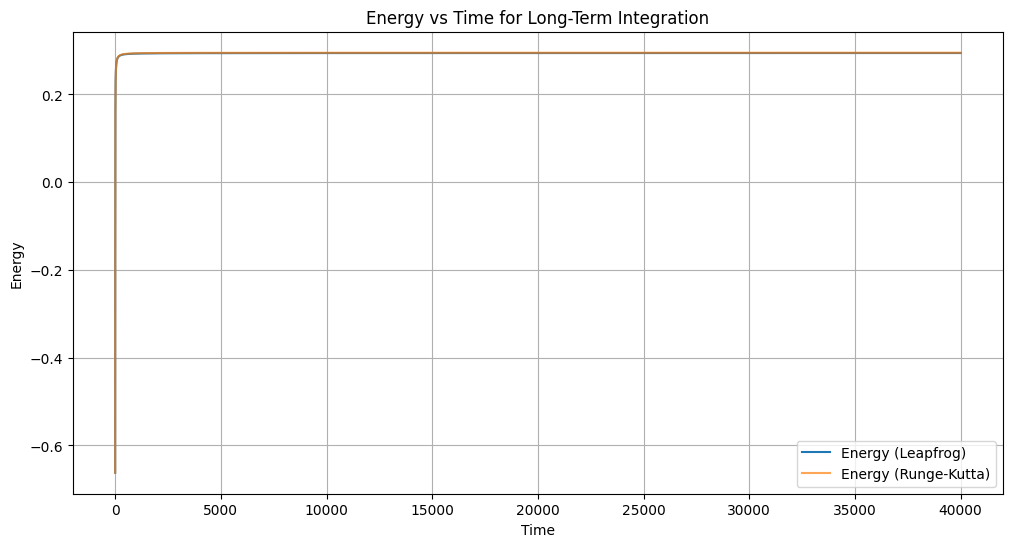

Leapfrog method took: 0.30 seconds
Runge-Kutta method took: 0.01 seconds


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

# Define the acceleration function from the potential
def acceleration(x, y):
    phi = -1 / np.sqrt(1 + x**2 + y**2)
    denom = (1 + x**2 + y**2) ** 1.5
    return [-x * phi / denom, -y * phi / denom]

# Leapfrog Method
def leapfrog_method(acc, y0, t):
    n = len(t)
    y = np.zeros((n, 4))
    y[0] = y0
    dt = t[1] - t[0]
    # Half-step for velocity
    vx_half = y0[2] + 0.5 * dt * acc(y0[0], y0[1])[0]
    vy_half = y0[3] + 0.5 * dt * acc(y0[0], y0[1])[1]

    for i in range(1, n):
        y[i, 0] = y[i-1, 0] + dt * vx_half
        y[i, 1] = y[i-1, 1] + dt * vy_half
        ax, ay = acc(y[i, 0], y[i, 1])
        vx_full = vx_half + dt * ax
        vy_full = vy_half + dt * ay
        vx_half = vx_full
        vy_half = vy_full
        y[i, 2] = vx_full
        y[i, 3] = vy_full

    return y

# Runge-Kutta Method
def runge_kutta_method(acc, y0, t):
    sol = solve_ivp(
        lambda t, y: [y[2], y[3], *acc(y[0], y[1])],
        [t[0], t[-1]],
        y0,
        t_eval=t,
        method='RK45',
        rtol=1e-6,
        atol=1e-9
    )
    return sol.y.T

# Calculate the energy of the system
def energy(y, acc):
    vx, vy = y[:, 2], y[:, 3]
    kinetic = 0.5 * (vx**2 + vy**2)
    potential_energy = np.array([-1 / np.sqrt(1 + x**2 + y**2) for x, y in zip(y[:, 0], y[:, 1])])
    return kinetic + potential_energy

# Initial conditions
y0 = [1.0, 0.0, 0.0, -0.3]  # [x, y, vx, vy]

# Time points for long-term simulation
t_max_long = 40000
t_points_long = np.arange(0, t_max_long, 0.4)

# Measure the wall clock time for the Leapfrog method
start_time_leapfrog = time.time()
y_leapfrog_long = leapfrog_method(acceleration, y0, t_points_long)
end_time_leapfrog = time.time()

# Measure the wall clock time for the Runge-Kutta method
start_time_rk = time.time()
y_runge_kutta_long = runge_kutta_method(acceleration, y0, t_points_long)
end_time_rk = time.time()

# Compute the energy for both methods
energy_leapfrog_long = energy(y_leapfrog_long, acceleration)
energy_rk_long = energy(y_runge_kutta_long, acceleration)

# Compute the wall clock time for each method
wall_time_leapfrog = end_time_leapfrog - start_time_leapfrog
wall_time_rk = end_time_rk - start_time_rk

# Plot the energy vs time for both methods
plt.figure(figsize=(12, 6))
plt.plot(t_points_long, energy_leapfrog_long, label='Energy (Leapfrog)')
plt.plot(t_points_long, energy_rk_long, label='Energy (Runge-Kutta)', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy vs Time for Long-Term Integration')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

# The wall clock times are:
print(f"Leapfrog method took: {wall_time_leapfrog:.2f} seconds")
print(f"Runge-Kutta method took: {wall_time_rk:.2f} seconds")
